In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from genetic_selection import GeneticSelectionCV
import pandas as pd
from sklearn import metrics
from sklearn import svm
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv('../water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df['ph'].fillna(value=df['ph'].median(),inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].median(),inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median(),inplace=True)

In [4]:
X = df.drop('Potability',axis=1).values
y = df['Potability'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

In [5]:
clf = svm.SVC(kernel='rbf')

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
models = GeneticSelectionCV(
    clf, cv=5, verbose=0,
    scoring="accuracy", max_features=5,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)

In [8]:
models.fit(X_train, y_train)
y_pred = models.predict(X_test)

In [9]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

Accuracy: 0.669379450661241
Precision: 0.7008983890954151
Recall: 0.6212098041714456


array([[526,  44],
       [281, 132]], dtype=int64)

Text(30.5, 0.5, 'ACTUAL')

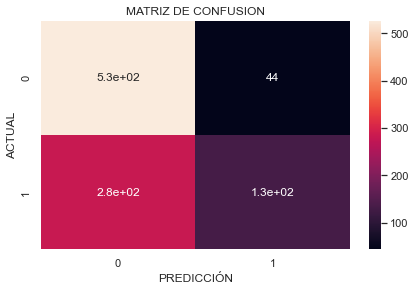

In [10]:
sns.set()
f, ax=plt.subplots()
sns.heatmap(cnf_matrix, annot=True, ax=ax)
ax.set_title('MATRIZ DE CONFUSION'), plt.tight_layout()
ax.set_xlabel('PREDICCIÓN')
ax.set_ylabel('ACTUAL')